### Zaawansowane Metody Uczenia Maszynowego

#### Laboratorium 2

#### Klasyfikacja wieloklasowa

### Zadanie 1 
------------
Czym jest problem klasyfikacji wieloklasowej? Podaj przykład danych dla tego problemu.

- zmienna odpowiedzi $Y  \in \mathcal{Y}$, gdzie $\mathcal{Y} = \{0, 1, \dots, g\}$
- wektor zmiennych objaśniających $\mathbf{X} = (X_1, \dots, X_p) \in \mathcal{X}$, gdzie $\mathcal{X}$ jest przestrzenią cech
- funkcja klasyfikacji $d: \mathcal{X} \rightarrow \mathcal{Y}$
- klasyfikacja Bayesa: $d(x) = \argmax_{y=1, \dots, g} P(Y = y | X=x)$

Przykład danych: zbiór o irysach.

---------------------

*Nie wszystkie klasyfikacyjne modele predykcyjne obsługują klasyfikację wieloklasową. Na przykład: perceptron, regresja logistyczna czy maszyny wektorów podpierających (SVM).*

*Note*

Jednym z podejść do korzystania z algorytmów klasyfikacji binarnej w przypadku problemów z klasyfikacją wieloklasową jest podzielenie zbioru danych klasyfikacji wieloklasowej na wiele zbiorów danych klasyfikacji binarnej i dopasowanie modelu klasyfikacji binarnej do każdego z nich. Dwa różne przykłady tego podejścia to strategie One-vs-Rest i One-vs-One.

#### One-vs-Rest (OvR)
Inaczej Ove-vs-All (OvA)

Dzielimy zbiór danych na wiele problemów klasyfikacji binarnej. Na przykładzie zbioru danych `iris`.
Dostępne klasy: *setosa*, *versicolor*, *virginica*.

Trzy zestawy:
- *setosa* vs (*versicolor*, *virginica*)
- *versicolor* vs (*setosa*, *virginica*)
- *virginica* vs (*setosa*, *versicolor*)


*Note*

1) Problem w przypadku dużych zbiorów danych (np. milion wierszy), powolnych modeli (np. sieci neuronowych), duża liczba klas (np. setki klas).

2) Ta strategia jest domyślna dla algorytmów w `sciki-learn`.

### Zadanie 2
-----
Przygotuj model klasyfikacji wieloklasowej (model regresji logistycznej) z użyciem strategii OvR. 

In [31]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)

In [32]:
model = LogisticRegression(multi_class='ovr')
model.fit(X, y)

y_hat = model.predict(X)

#### `OneVsRestClassifier`

https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier

### Zadanie 3
----
Wykorzystując klasę `OneVsRestClassifier` przygotuj dla poprzedniego zbioru danych:
1) model oparty na regresji logistycznej,
2) model oparty na SVM.

In [33]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

clf_logistic = OneVsRestClassifier(LogisticRegression()).fit(X,y)
y_logistic_pred = clf_logistic.predict(X)


clf_svm = OneVsRestClassifier(SVC()).fit(X,y)
y_svm_pred = clf_svm.predict(X)

#### One-vs-One (OvO)

Podobnie jak w OvR dzielimy problem klasyfikacji wieloklasowej na problemy klasyfikacji binarnej.

Przykład 4 klas: czerowna, niebieska, zielona i żółta.

1) czerwony vs niebieski
2) czerwony vs zielony
3) czerowny vs żółty
4) niebieski vs zielony
5) niebieski vs żółty
6) zielony vs żółty

*Note*

$n$ - liczba klas

Liczba modeli: $\frac{n\cdot (n-1)}{2}$


### Zadanie 4
-----
Przygotuj model klasyfikacji wieloklasowej (model SVM) z użyciem strategii OvR dla wcześniejszego zbioru danych.

In [34]:
from sklearn.svm import SVC

model = SVC(decision_function_shape='ovo')
model.fit(X, y)

yhat = model.predict(X)

### Metryki oceny jakości predykcyjnej

### Zadanie 5
Zbuduj model dla danych o diamentach i oceń jego jakość predykcyjną.

a) Przeprowadź eksploracyjną analizę danych.

b) Przygotuj dane do modelowania (używająć `pipeline`).

c) Przygotuj wybrany przez Ciebie model w wersji OvR.

d) Oceń jakoś swojego modelu wyliczając metryki oraz narysuj krzywą ROC i podaj miarę AUC.

In [35]:
import pandas as pd
# diamonds = pd.read_csv("https://raw.githubusercontent.com/Swatikhedekar/Dada-Analysis-on-Diamonds-Dataset/main/diamonds.csv", index_col=0)
# lub
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
diamonds = pd.DataFrame(diamonds)

In [36]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [37]:
diamonds = diamonds[diamonds["cut"] != "Very Good"]

In [38]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41858 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    41858 non-null  float64 
 1   cut      41858 non-null  category
 2   color    41858 non-null  category
 3   clarity  41858 non-null  category
 4   depth    41858 non-null  float64 
 5   table    41858 non-null  float64 
 6   price    41858 non-null  int64   
 7   x        41858 non-null  float64 
 8   y        41858 non-null  float64 
 9   z        41858 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 2.7 MB


In [39]:
diamonds.shape

(41858, 10)

In [40]:
diamonds.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
carat,41858.0,0.796,0.478,0.2,0.40,0.70,1.05,5.01
depth,41858.0,61.730,1.447,43.0,61.10,61.80,62.40,79.00
table,41858.0,57.313,2.246,43.0,56.00,57.00,59.00,95.00
price,41858.0,3918.668,4004.706,326.0,956.00,2346.50,5312.00,18823.00
x,41858.0,5.728,1.128,0.0,4.70,5.68,6.56,10.74
y,41858.0,5.724,1.153,0.0,4.71,5.68,6.54,58.90
z,41858.0,3.533,0.698,0.0,2.90,3.51,4.04,8.06


In [41]:
diamonds.cut.value_counts()

Ideal        21551
Premium      13791
Good          4906
Fair          1610
Very Good        0
Name: cut, dtype: int64

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

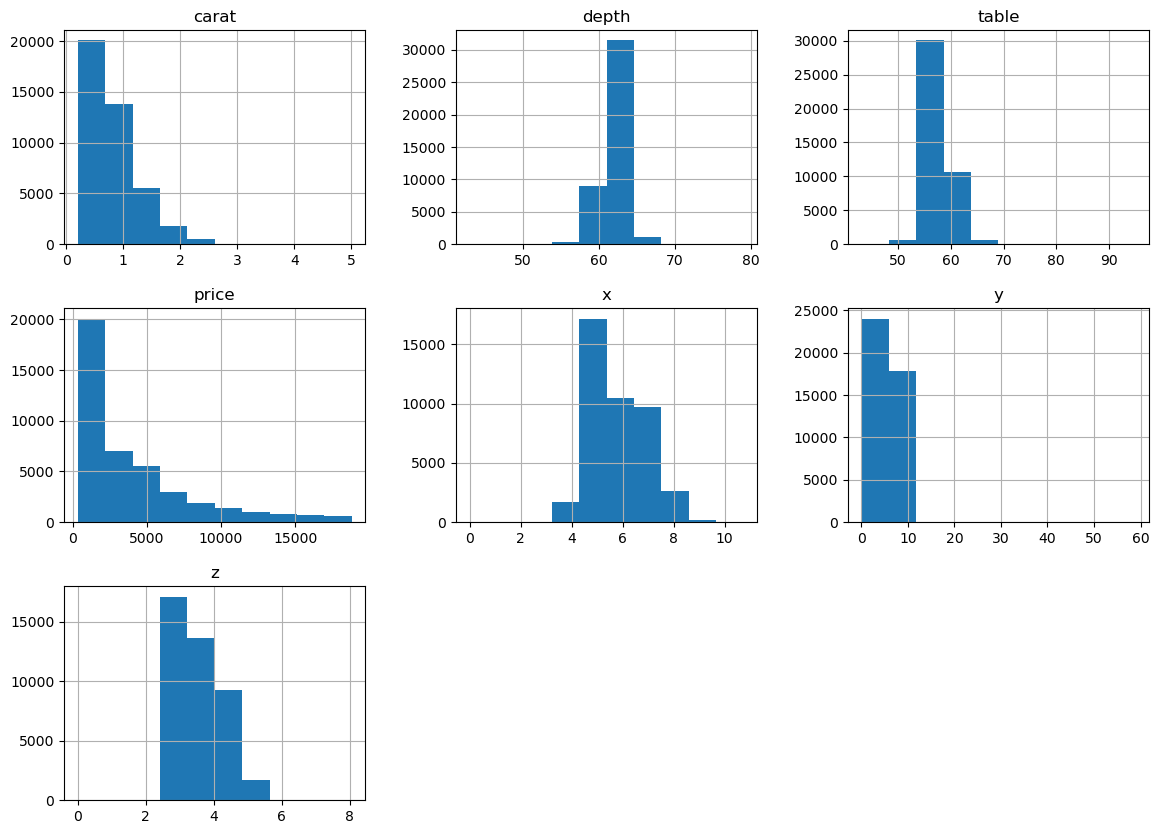

In [42]:
diamonds.hist(figsize=(14,10))

<Axes: >

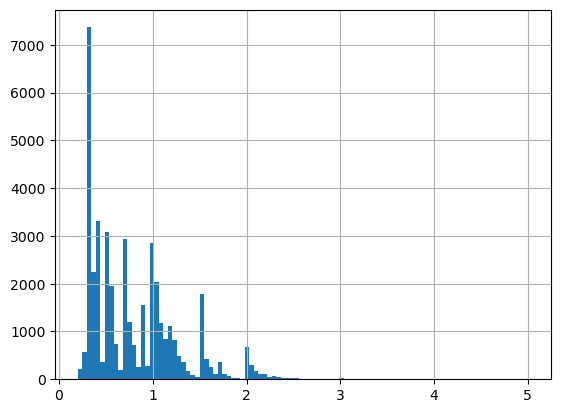

In [43]:
diamonds.carat.hist(bins=100)

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, StandardScaler
from sklearn.linear_model import LogisticRegression

preprocesor = ColumnTransformer(
    transformers=[
        ("categorical", OneHotEncoder(handle_unknown="ignore"), ["color", "clarity"]),
        ("power_transform", PowerTransformer(), ["price", "carat"]),
        ("scale", StandardScaler(), ["x", "y", "z", "depth", "table", "price", "carat"])
    ]
)

pipeline = Pipeline(
    steps=[
        ("preprocess", preprocesor),
        ("model", LogisticRegression(max_iter=2000))
    ]
)


In [45]:
y = diamonds.cut
X = diamonds.drop(["cut"], axis=1)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['color', 'clarity']),
                                                 ('power_transform',
                                                  PowerTransformer(),
                                                  ['price', 'carat']),
                                                 ('scale', StandardScaler(),
                                                  ['x', 'y', 'z', 'depth',
                                                   'table', 'price',
                                                   'carat'])])),
                ('model', LogisticRegression(max_iter=2000))])

In [47]:
y_pred = pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm

array([[ 193,   67,   40,   83],
       [  46,  445,  336,  438],
       [   1,   22, 5022,  419],
       [   6,   97,  569, 2681]], dtype=int64)

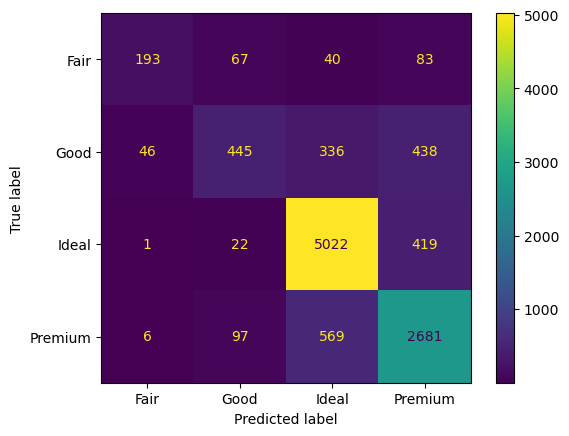

In [48]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=pipeline.classes_)
disp.plot()

*Przykład*

<div class="tg-wrap"><table>
<tbody>
  <tr>
    <td rowspan="5">True label</td>
    <td>Ideal</td>
    <td>22</td>
    <td>7</td>
    <td>10</td>
    <td>18</td>
  </tr>
  <tr>
    <td>Premium</td>
    <td>5</td>
    <td>27</td>
    <td>7</td>
    <td>6</td>
  </tr>
  <tr>
    <td>Good</td>
    <td>2</td>
    <td>12</td>
    <td>54</td>
    <td>6</td>
  </tr>
  <tr>
    <td>Fair</td>
    <td>9</td>
    <td>9</td>
    <td>9</td>
    <td>47</td>
  </tr>
  <tr>
    <td></td>
    <td>Ideal</td>
    <td>Premium</td>
    <td>Good</td>
    <td>Fair</td>
  </tr>
  <tr>
    <td></td>
    <td colspan="5">Predicted label</td>
  </tr>
</tbody>
</table></div>

*Precyzja* = $\frac{TP}{TP + FP}$

Precyjza dla klasy **Ideal**:

$\frac{22}{22 + 5 + 2 + 9} = \frac{22}{38} = 0.578 $

*Recall* = $\frac{TP}{TP + FN}$

Recall dla klasy **Premium**:

$\frac{27}{27 + 5+7+6} = \frac{27}{45} = 0.6 $

Dla każdego problemu trzeba na nowo zdefiniować klasy pozytywne i klasy negatywne. Ponieważ w przypadku OvR otrzymamy tyle miar ile klas (np. 3 klasy to 3 precyzje) należy jakoś uśredniać wyniki.

### 3 techniki:

- macro

Średnia arytmetyczna wszystkich metryk dla różnych klas. Nadajemy równe wagi wszystkim klasom. Dobra opcja dla zrównoważonych zadań klasyfikacyjnych.

- weighted

Uwzględnia nierównowagę klas. Średnia ważona.

- micro



### Raport sklearn

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Fair       0.78      0.50      0.61       383
        Good       0.71      0.35      0.47      1265
       Ideal       0.84      0.92      0.88      5464
     Premium       0.74      0.80      0.77      3353

    accuracy                           0.80     10465
   macro avg       0.77      0.64      0.68     10465
weighted avg       0.79      0.80      0.78     10465

